In [1]:
import os

# Change to the parent directory
os.chdir('../..')

# Verify the path using getcwd()
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import src.file_loader as fl
import src.sysid_pem as sid
import src.data_processing as dp
import src.plotting as plot
import scipy as sp
import control as ct

In [3]:
import importlib
importlib.reload(dp)


<module 'src.data_processing' from 'c:\\Users\\onyer\\OneDrive\\Desktop\\Research work\\1. Projects\\Battery_Analysis1\\src\\data_processing.py'>

Columns: Index(['flags', 'Ns', 'time/s', 'control/mA', 'Ewe/V', 'I/mA', 'dQ/C',
       '(Q-Qo)/C', 'half cycle', 'Q charge/discharge/mA.h', 'I Range'],
      dtype='object')
Data: 0     0.000000
1    10.000000
2    19.999999
3    29.999999
4    39.999999
Name: time/s, dtype: float64
Columns: Index(['control/mA', 'Ewe/V'], dtype='object')
Data:            control/mA     Ewe/V
time/s                         
0.000000         0.01  0.407403
10.000000        0.01  0.729420
19.999999        0.01  0.746633
29.999999        0.01  0.757071
39.999999        0.01  0.764113


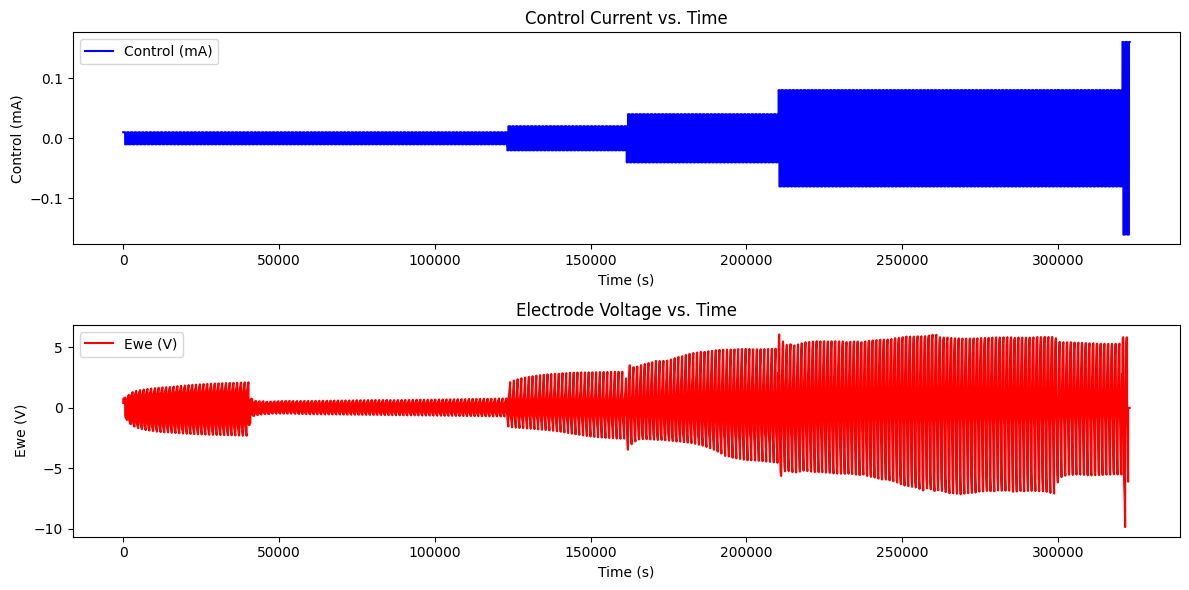

In [4]:
# Load data
mpr_file4 = fl.load_mpr("12to1-25%CNC-3%GQDs _C01.mpr")
df4 = pd.DataFrame(mpr_file4.data)

# Get columns
print("Columns:", df4.columns)
print("Data:", df4['time/s'].head())


# df4['time'] = df4.index
df4 = df4.set_index('time/s')[['control/mA', 'Ewe/V']]

print("Columns:", df4.columns)
print("Data:", df4.head())

# Plotting
plt.figure(figsize=(12, 6))

# Plot 'control/mA'
plt.subplot(2, 1, 1)
plt.plot(df4.index, df4['control/mA'], color='blue', label='Control (mA)')
plt.xlabel('Time (s)')
plt.ylabel('Control (mA)')
plt.title('Control Current vs. Time')
plt.legend()

# Plot 'Ewe/V'
plt.subplot(2, 1, 2)
plt.plot(df4.index, df4['Ewe/V'], color='red', label='Ewe (V)')
plt.xlabel('Time (s)')
plt.ylabel('Ewe (V)')
plt.title('Electrode Voltage vs. Time')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [5]:
# df4_sliced = df4.loc[100000:200000]

# df4_sliced = df4.loc[0:1750]

In [6]:
# # Plotting
# plt.figure(figsize=(12, 6))

# # Plot 'control/mA'
# plt.subplot(2, 1, 1)
# plt.plot(df4_sliced.index, df4_sliced['control/mA'], color='blue', label='Control (mA)')
# plt.xlabel('Time (s)')
# plt.ylabel('Control (mA)')
# plt.title('Control Current vs. Time (100000s to 200000s)')
# plt.legend()

# # Plot 'Ewe/V'
# plt.subplot(2, 1, 2)
# plt.plot(df4_sliced.index, df4_sliced['Ewe/V'], color='red', label='Ewe (V)')
# plt.xlabel('Time (s)')
# plt.ylabel('Ewe (V)')
# plt.title('Electrode Voltage vs. Time (100000s to 200000s)')
# plt.legend()

# # Adjust layout
# plt.tight_layout()
# plt.show()


In [7]:
# # Plotting
# plt.figure(figsize=(12, 6))

# # Scatter plot for 'control/mA'
# plt.subplot(2, 1, 1)
# plt.scatter(df4_sliced.index, df4_sliced['control/mA'], color='blue', label='Control (mA)', s=10)
# plt.xlabel('Time (s)')
# plt.ylabel('Control (mA)')
# plt.title('Control Current vs. Time (100000s to 200000s)')
# plt.legend()

# # Scatter plot for 'Ewe/V'
# plt.subplot(2, 1, 2)
# plt.scatter(df4_sliced.index, df4_sliced['Ewe/V'], color='red', label='Ewe (V)', s=10)
# plt.xlabel('Time (s)')
# plt.ylabel('Ewe (V)')
# plt.title('Electrode Voltage vs. Time (100000s to 200000s)')
# plt.legend()

# # Adjust layout
# plt.tight_layout()
# plt.show()


In [8]:
# time = df4.index.values
# voltage = df4['Ewe/V'].values
# current = df4['control/mA'].values

# # Convert current from mA to A (optional, depends on your needs)
# current = current / 1000  

# # Initialize the estimator with extracted data
# estimator = BatteryParameterEstimator(time, voltage, current)

# # Estimate parameters using both LS and IV methods
# params_ls, params_iv = estimator.estimate_parameters()

# # Display results
# print("Least Squares Estimated Parameters:", params_ls)
# print("Instrumental Variable Estimated Parameters:", params_iv)


In [9]:
# def estimate_voltage(params, time, current):
#     """Estimate voltage using identified ECM parameters."""
#     R0, a1, a2, b1, b2 = params  # Extract parameters
#     dt = np.mean(np.diff(time))  # Compute time step

#     # Compute estimated voltage (Simplified ECM model: V = R0 * I + (other terms))
#     estimated_voltage = R0 * current + b1 * np.gradient(current, dt) + b2 * np.gradient(np.gradient(current, dt), dt)
    
#     return estimated_voltage

# # Compute estimated voltages
# voltage_ls = estimate_voltage(params_ls, time, current)
# voltage_iv = estimate_voltage(params_iv, time, current)

# # Plot actual vs. estimated voltage
# plt.figure(figsize=(10, 5))
# plt.plot(time, voltage, label="Actual Voltage", linewidth=2)
# plt.plot(time, voltage_ls, label="LS Estimated Voltage", linestyle="--")
# plt.plot(time, voltage_iv, label="IV Estimated Voltage", linestyle=":")
# plt.xlabel("Time (s)")
# plt.ylabel("Voltage (V)")
# plt.title("Actual vs Estimated Voltage")
# plt.legend()
# plt.grid()
# plt.show()


In [10]:
print(df4['control/mA'].unique())

[ 0.01 -0.01  0.   -0.02  0.02 -0.04  0.04  0.08 -0.08  0.16 -0.16]


In [11]:
# cycles = dp.find_charging_cycles(df4)

# # Plot the cycles
# plot.plot_cycles(cycles)


In [12]:
df4.columns

Index(['control/mA', 'Ewe/V'], dtype='object')

In [13]:
# Run the find_charging_cycles function
charging_cycles = dp.find_charging_cycles(df4)
# charging_cycles = dp.slice_df_by_index_range(df4, 1750)

# Extracting 'Ewe/V' and 'control/mA' for each cycle
yy = [cycle['Ewe/V'].values for cycle in charging_cycles]
uu = [cycle['control/mA'].values for cycle in charging_cycles]

In [14]:
# # Not interested in this
# # Plotting
# plt.figure(figsize=(12, 6))

# # Plot 'control/mA'
# plt.subplot(2, 1, 1)
# plt.plot(uu[0], color='blue', label='Control (mA)')
# plt.xlabel('Time (s)')
# plt.ylabel('Control (mA)')
# # plt.title('Control Current vs. Time (100000s to 200000s)')
# plt.legend()

# # Plot 'Ewe/V'
# plt.subplot(2, 1, 2)
# plt.plot(yy[0], color='red', label='Ewe (V)')
# plt.xlabel('Time (s)')
# plt.ylabel('Ewe (V)')
# # plt.title('Electrode Voltage vs. Time (100000s to 200000s)')
# plt.legend()

# # Adjust layout
# plt.tight_layout()
# plt.show()




In [15]:
# # List of configurations (nf, nb)
# configurations = [
#     {'nf': 3, 'nb': 4},
#     {'nf': 4, 'nb': 5},
#     {'nf': 5, 'nb': 6}
# ]

# # Initialize lists to store results for each configuration
# theta_arx_all = []
# optimization_results_all = []

# # Iterate over each configuration
# for config_index, config in enumerate(configurations):
#     nf = config['nf']
#     nb = config['nb']
#     nc = 0
#     nd = 0
#     nk = 0
#     na = nf

#     theta_arx_list = []
#     optimization_results_list = []

#     for i in range(1, len(yy)):  # Skip the first cycle
#         uu[i] = uu[i] - uu[i][0] * np.ones(len(uu[i]))
#         yy[i] = yy[i] - yy[i][0] * np.ones(len(yy[i]))

#         n_arx = [nf, nb, nk]
#         n_bj = [nb, nc, nd, nf, nk]
#         n_high_order_approx = [10, 10]

#         # Initial parameter estimate
#         theta_init = sid.get_initial_estimate_box_jenkins(n_bj, n_high_order_approx, yy[i], uu[i])
#         theta_arx_list.append(theta_init)

#         # Optimize
#         optimization_results = sp.optimize.least_squares(
#             sid.V_box_jenkins,
#             theta_init,
#             jac=sid.jac_V_bj,
#             args=(n_bj, yy[i], uu[i])
#         )

#         optimization_results_list.append(optimization_results)

#     # Store results for each configuration
#     theta_arx_all.append(theta_arx_list)
#     optimization_results_all.append(optimization_results_list)


In [16]:
nf = 3
nb = 4
nc = 0
nd = 0
na = nf
nk = 0

# Initialize lists to store results
theta_arx_list1 = []
theta_bj_list1 = []
optimization_results_list1 = []

# Iterate through all arrays in yy and uu
# for i in range(199, 200):
for i in range(1, len(yy)): # Skip the first cycle
    uu[i] = uu[i] - uu[i][0] * np.ones(len(uu[i]))
    yy[i] = yy[i] - yy[i][0] * np.ones(len(yy[i]))

    # Calculate the ARX model parameters
    n_arx = [nf, nb, nk]
    n_bj = [nb, nc, nd, nf, nk]
    n_high_order_approx = [10,10]
    # theta_arx = sid.V_arx_lin_reg(n_arx, yy[i], uu[i])
    theta_init = sid.get_initial_estimate_box_jenkins(n_bj,n_high_order_approx, yy[i],uu[i])
    
    # Store theta_arx in the list
    theta_arx_list1.append(theta_init)
    
    # Prepare initial guess for Box-Jenkins model
    #theta_box_jenkins = np.concatenate((
    #    theta_init[n_arx[0]:np.sum(n_arx)], 
    #    np.zeros(nc + nd), 
    #    theta_init[0:n_arx[0]]
    #))

    # Define the structure for the Box-Jenkins model
    # n_bj = [nb, nc, nd, nf, nk]
    
    # Perform optimization
    optimization_results1 = sp.optimize.least_squares(
        sid.V_box_jenkins, 
        theta_init, 
        jac=sid.jac_V_bj, 
        args=(n_bj, yy[i], uu[i])
    )
    
    # Store the optimization results in the list
    optimization_results_list1.append(optimization_results1)

In [17]:
nf = 4
nb = 5
nc = 0
nd = 0
na = nf
nk = 0

# Initialize lists to store results
theta_arx_list2 = []
theta_bj_list2 = []
optimization_results_list2 = []

# Iterate through all arrays in yy and uu
# for i in range(199, 200):
for i in range(1, len(yy)): # Skip the first cycle
    uu[i] = uu[i] - uu[i][0] * np.ones(len(uu[i]))
    yy[i] = yy[i] - yy[i][0] * np.ones(len(yy[i]))

    # Calculate the ARX model parameters
    n_arx = [nf, nb, nk]
    n_bj = [nb, nc, nd, nf, nk]
    n_high_order_approx = [10,10]
    # theta_arx = sid.V_arx_lin_reg(n_arx, yy[i], uu[i])
    theta_init = sid.get_initial_estimate_box_jenkins(n_bj,n_high_order_approx, yy[i],uu[i])
    
    # Store theta_arx in the list
    theta_arx_list2.append(theta_init)
    
    # Prepare initial guess for Box-Jenkins model
    #theta_box_jenkins = np.concatenate((
    #    theta_init[n_arx[0]:np.sum(n_arx)], 
    #    np.zeros(nc + nd), 
    #    theta_init[0:n_arx[0]]
    #))

    # Define the structure for the Box-Jenkins model
    n_bj = [nb, nc, nd, nf, nk]
    
    # Perform optimization
    optimization_results2 = sp.optimize.least_squares(
        sid.V_box_jenkins, 
        theta_init, 
        jac=sid.jac_V_bj, 
        args=(n_bj, yy[i], uu[i])
    )
    
    # Store the optimization results in the list
    optimization_results_list2.append(optimization_results2)

c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:154: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = phi / phi_prime
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:166: RuntimeWarning: divide by zero encountered in scalar divide
  p *= Delta / norm(p)
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:166: RuntimeWarning: invalid value encountered in multiply
  p *= Delta / norm(p)
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optim

In [18]:
nf = 5
nb = 6
nc = 0
nd = 0
na = nf
nk = 0

# Initialize lists to store results
theta_arx_list3 = []
theta_bj_list3 = []
optimization_results_list3 = []

# Iterate through all arrays in yy and uu
# for i in range(199, 200):
for i in range(1, len(yy)): # Skip the first cycle
    uu[i] = uu[i] - uu[i][0] * np.ones(len(uu[i]))
    yy[i] = yy[i] - yy[i][0] * np.ones(len(yy[i]))

    # Calculate the ARX model parameters
    n_arx = [nf, nb, nk]
    n_bj = [nb, nc, nd, nf, nk]
    n_high_order_approx = [10,10]
    # theta_arx = sid.V_arx_lin_reg(n_arx, yy[i], uu[i])
    theta_init = sid.get_initial_estimate_box_jenkins(n_bj,n_high_order_approx, yy[i],uu[i])
    
    # Store theta_arx in the list
    theta_arx_list3.append(theta_init)
    
    # Prepare initial guess for Box-Jenkins model
    #theta_box_jenkins = np.concatenate((
    #    theta_init[n_arx[0]:np.sum(n_arx)], 
    #    np.zeros(nc + nd), 
    #    theta_init[0:n_arx[0]]
    #))

    # Define the structure for the Box-Jenkins model
    n_bj = [nb, nc, nd, nf, nk]
    
    # Perform optimization
    optimization_results3 = sp.optimize.least_squares(
        sid.V_box_jenkins, 
        theta_init, 
        jac=sid.jac_V_bj, 
        args=(n_bj, yy[i], uu[i])
    )
    
    # Store the optimization results in the list
    optimization_results_list3.append(optimization_results3)

c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:141: RuntimeWarning: invalid value encountered in scalar multiply
  alpha = max(0.001 * alpha_upper, (alpha_lower * alpha_upper)**0.5)
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in square
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: invalid value encountered in divide
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:118: RuntimeWarning: overflow encountered in multiply
  suf = s * uf
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\B

In [19]:
# Lists to store x and cost values
Ts = 0.005

x_values1 = []
cost_values1 = []
residuals1 = []
n_bj1 = [4, 0, 0, 3, 0]  # nb, nc, nd, nf, nk
estimated_poles1 = np.empty((len(optimization_results_list1), 3), dtype=complex)

# Iterate through the optimization results
ii = 0
for result in optimization_results_list1:
    x_values1.append(result.x)
    cost_values1.append(result.cost)
    residuals1.append(np.sum(result.fun[11:-1]**2))
    
    
    G_hat_box_jenkins, H_hat_box_jenkins = sid.theta_2_tf_box_jenkins(
        result.x, n_bj1, Ts
    )
    estimated_poles1[ii,:] = (G_hat_box_jenkins.poles())
    
    # Print x and cost
    print(f"[Model 1] Cycle {ii+1}: cost = {result.cost}")
    print("x:", result.x)
    print("cost:", result.cost)
    print("Residuals:", result.fun)
    print("Residuals1:", residuals1)
    print("Estimated poles:", estimated_poles1[ii,:])
    print()
    
    ii += 1



[Model 1] Cycle 1: cost = 0.004081467549981576
x: [ 4.07167538e+01 -3.66934901e+01 -3.03118451e+01  2.63126341e+01
 -1.80372316e+00  8.24477869e-01 -2.12363473e-02]
cost: 0.004081467549981576
Residuals: [ 0.00000000e+00 -5.30499220e-03 -1.04954839e-02 -1.58577561e-02
 -2.12963223e-02 -2.66585350e-02 -3.18681598e-02 -3.72112989e-02
 -4.25353646e-02 -4.82220054e-02 -1.90288735e-06  1.40341344e-04
 -2.63108881e-03  1.55642986e-03  1.43346970e-03  1.33848641e-03
  1.06896939e-03  8.61682798e-04  7.90600807e-04 -1.20758152e-03
 -2.25625115e-03 -2.26504636e-03 -2.18704433e-03 -1.96797838e-03
 -1.73676496e-03 -1.08681657e-03 -5.30618565e-04  2.33264542e-04
  1.15291572e-03  1.49714283e-03  2.16224242e-03  2.06439157e-03
  2.37499088e-03  2.22627156e-03  1.80191362e-03  1.49723040e-03
  1.82109729e-04 -2.57627984e-04 -2.82359128e-04 -2.18614276e-04
 -3.15950508e-04 -4.41994480e-04 -4.64168105e-04 -6.88438449e-04
 -7.33730248e-04 -4.86053244e-04 -7.09000667e-04 -7.35044367e-04
 -7.36130766e-04 

In [20]:
x_values2 = []
cost_values2 = []
residuals2 = []
n_bj2 = [5, 0, 0, 4, 0]
estimated_poles2 = np.empty((len(optimization_results_list2), 4), dtype=complex)

# Iterate through the optimization results
ii = 0
for result in optimization_results_list2:
    x_values2.append(result.x)
    cost_values2.append(result.cost)
    residuals2.append(np.sum(result.fun[11:-1]**2))
    
    
    G_hat_box_jenkins, H_hat_box_jenkins = sid.theta_2_tf_box_jenkins(
        result.x, n_bj2, Ts
    )
    estimated_poles2[ii,:] = (G_hat_box_jenkins.poles())
    
    # Print x and cost
    print(f"[Model 2] Cycle {ii+1}: cost = {result.cost}")
    print("x:", result.x)
    print("cost:", result.cost)
    print("Residuals:", result.fun)
    print("Estimated poles:", estimated_poles1[ii,:])
    print()
    
    ii += 1




[Model 2] Cycle 1: cost = 4592406803.532901
x: [  59.02013547   85.8808141  -123.54575804  -12.22006562   77.09524156
    1.3031951    -2.06819402    0.1795776     0.35187209]
cost: 4592406803.532901
Residuals: [ 0.00000000e+00 -5.30499220e-03 -1.04954839e-02 -1.58577561e-02
 -2.12963223e-02 -2.66585350e-02 -3.18681598e-02 -3.72112989e-02
 -4.25353646e-02 -4.82220054e-02 -3.66069527e-01  1.89716687e-01
  4.98284838e-01  2.69066715e-01  7.46023675e-02 -1.46989086e-01
 -3.11881774e-01 -4.30050032e-01 -5.01174160e-01 -5.40173209e-01
 -5.54485961e-01 -5.53500901e-01 -5.44839557e-01 -5.32915127e-01
 -5.20439851e-01 -5.08305135e-01 -4.97493396e-01 -4.87714123e-01
 -4.78815238e-01 -4.71260096e-01 -4.63900486e-01 -4.57618281e-01
 -4.51097078e-01 -4.45109967e-01 -4.39417436e-01 -4.33594938e-01
 -4.28760683e-01 -4.23025252e-01 -4.16852491e-01 -4.10568284e-01
 -4.04433655e-01 -3.98300337e-01 -3.92078446e-01 -3.85985361e-01
 -3.79839705e-01 -3.73067366e-01 -3.67498742e-01 -3.60026525e-01
 -3.56376

In [21]:
# # Lists to store x and cost values
Ts = 0.005

x_values3 = []
cost_values3 = []
n_bj3 = [6, 0, 0, 5, 0]
estimated_poles3 = np.empty((len(optimization_results_list3), 5), dtype=complex)
residuals3 = []


# Iterate through the optimization results
ii = 0
for result in optimization_results_list3:
    x_values3.append(result.x)
    cost_values3.append(result.cost)
    residuals3.append(np.sum(result.fun[11:-1]**2))
    
    
    G_hat_box_jenkins, H_hat_box_jenkins = sid.theta_2_tf_box_jenkins(
        result.x, n_bj3, Ts
    )
    estimated_poles3[ii,:] = (G_hat_box_jenkins.poles())
    
    # Print x and cost
    print(f"[Model 3] Cycle {ii+1}: cost = {result.cost}")
    print("x:", result.x)
    print("cost:", result.cost)
    print("Residuals:", result.fun)
    print("Estimated poles:", estimated_poles1[ii,:])
    print()
    
    ii += 1




[Model 3] Cycle 1: cost = 3.791202897068314e+55
x: [ 5.30450855e+01  2.82818710e+02  2.41778323e+00 -1.50540418e+02
 -6.79875756e+01  1.32493006e+01  3.73394970e+00 -8.42875972e+00
 -3.23534514e+00 -5.72983821e-02  2.51320865e-01]
cost: 3.791202897068314e+55
Residuals: [ 0.00000000e+00 -5.30499220e-03 -1.04954839e-02 -1.58577561e-02
 -2.12963223e-02 -2.66585350e-02 -3.18681598e-02 -3.72112989e-02
 -4.25353646e-02 -4.82220054e-02 -2.46568531e-01 -1.20648159e+00
 -3.82253701e+00 -8.56538464e+00 -1.73467910e+01 -3.33894557e+01
 -6.27560421e+01 -1.16476123e+02 -2.14735196e+02 -3.94452708e+02
 -7.23142582e+02 -1.32428664e+03 -2.42372071e+03 -4.43447221e+03
 -8.11192359e+03 -1.48375861e+04 -2.71380947e+04 -4.96343850e+04
 -9.07776567e+04 -1.66024165e+05 -3.03642068e+05 -5.55328820e+05
 -1.01564316e+06 -1.85747208e+06 -3.39727646e+06 -6.21243062e+06
 -1.13657731e+07 -2.07647043e+07 -3.80881301e+07 -6.90338348e+07
 -1.29484564e+08 -2.19956851e+08 -4.86162263e+08 -4.27700351e+08
 -3.17160947e+0

C:\Users\onyer\AppData\Local\Temp\ipykernel_12820\1921567807.py:16: RuntimeWarning: overflow encountered in square
  residuals3.append(np.sum(result.fun[11:-1]**2))


[Model 3] Cycle 208: cost = 10522.177374233355
x: [  2.8465671   -1.52717484   3.82239982   5.25013108 -39.09849932
 -36.31088766   0.16854891  -3.00701025  -2.96737699   0.07336055
   1.75102059]
cost: 10522.177374233355
Residuals: [ 0.00000000e+00 -2.79564857e-02 -5.10654449e-02 -7.32779503e-02
 -9.54899788e-02 -1.16251945e-01 -1.37434006e-01 -1.57051086e-01
 -1.75675869e-01 -1.87831402e-01  4.94164753e-01  1.83272306e+00
  7.97659089e-01  9.14824965e-01  3.18564819e+00  1.86095199e+00
  3.72738476e+00  4.25063016e+00  2.41465337e+00  4.88723856e+00
  3.34920160e+00  3.12064353e+00  5.35197563e+00  2.61855107e+00
  4.66420465e+00  5.13204377e+00  2.88700165e+00  6.36895718e+00
  4.24726929e+00  4.11112402e+00  7.02658167e+00  3.29157549e+00
  6.12537175e+00  6.49978297e+00  3.49825636e+00  8.18711365e+00
  5.20642496e+00  5.26467228e+00  9.09970722e+00  4.03289993e+00
  7.99414303e+00  8.17550199e+00  4.20545356e+00  1.04152778e+01
  6.09849005e+00  6.26993494e+00  1.11592944e+01  4.

Outlier detected - Cycle: 121, Cost: 17.75, Z-Score: 6.76
Outlier detected - Cycle: 123, Cost: 27.56, Z-Score: 10.66
Outlier detected - Cycle: 131, Cost: 19.25, Z-Score: 7.36
Outlier detected - Cycle: 132, Cost: 17.29, Z-Score: 6.58


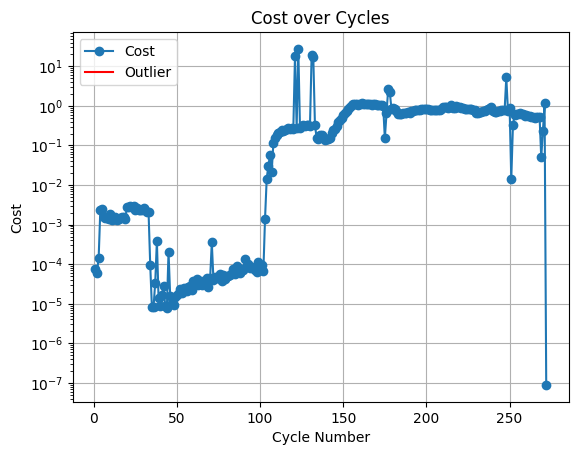

In [22]:
# Calculate mean and standard deviation of the cost values
mean_cost = np.mean(residuals1)
std_cost = np.std(residuals1)

# Calculate Z-scores
z_scores = [(cost - mean_cost) / std_cost for cost in residuals1]

# Threshold for identifying outliers (e.g., Z-score > 2)
threshold = 2
outliers = [(i + 1, residuals1[i], z_scores[i]) for i in range(len(z_scores)) if abs(z_scores[i]) > threshold]

# Print outliers
for cycle, cost, z_score in outliers:
    print(f"Outlier detected - Cycle: {cycle}, Cost: {cost:.2f}, Z-Score: {z_score:.2f}")

# Plot cost over cycles
plt.plot(range(1, len(residuals1) + 1), residuals1, marker='o', label='Cost')

# Highlight outliers
for cycle, cost, _ in outliers:
    plt.semilogy(cycle, cost, color='red', label='Outlier' if cycle == outliers[0][0] else "")
    
plt.xlabel('Cycle Number')
plt.ylabel('Cost')
plt.title('Cost over Cycles')
plt.legend()
plt.grid(True)
plt.show()

# Ts = 0.005  # Sampling time
# time_vector = np.arange(len(yy[1])) * Ts  # Same time base for all cycles

# # --- Use residual norms (excluding first 10s) instead of cost ---
# residual_norms = []

# for i, result in enumerate(optimization_results_all[0]):  # Use config 1 as example
#     residual = result.fun  # shape (n,)
    
#     # Time filtering: exclude residuals where time < 10s
#     valid_indices = time_vector >= 10  # boolean array
#     filtered_residual = residual[valid_indices]

#     # Compute norm of filtered residuals
#     residual_norm = np.linalg.norm(filtered_residual)  # L2 norm
#     residual_norms.append(residual_norm)

# # --- Outlier detection using Z-scores ---
# mean_residual = np.mean(residual_norms)
# std_residual = np.std(residual_norms)

# z_scores = [(r - mean_residual) / std_residual for r in residual_norms]

# threshold = 2
# outliers = [(i + 1, residual_norms[i], z_scores[i]) for i in range(len(z_scores)) if abs(z_scores[i]) > threshold]

# # --- Print and plot ---
# for cycle, res_norm, z_score in outliers:
#     print(f"Outlier detected - Cycle: {cycle}, Residual Norm: {res_norm:.2f}, Z-Score: {z_score:.2f}")

# # Plot
# plt.figure(figsize=(10, 5))
# plt.plot(range(1, len(residual_norms) + 1), residual_norms, marker='o', label='Residual Norm')

# for cycle, res_norm, _ in outliers:
#     plt.plot(cycle, res_norm, 'ro', label='Outlier' if cycle == outliers[0][0] else "")

# plt.xlabel('Cycle Number')
# plt.ylabel('Filtered Residual Norm')
# plt.title('Residual Norm over Cycles (Excluding First 10s)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


Outlier detected - Cycle: 235, Cost: 15720458481415535859025470184532065936323697312748946416009839486451781211953253363245977855270818350887368858808346476544.00, Z-Score: 16.46


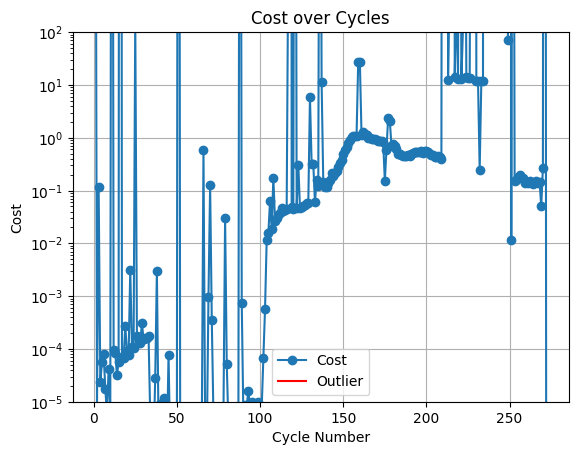

In [23]:
# Calculate mean and standard deviation of the cost values
mean_cost = np.mean(residuals2)
std_cost = np.std(residuals2)

# Calculate Z-scores
z_scores = [(cost - mean_cost) / std_cost for cost in residuals2]

# Threshold for identifying outliers (e.g., Z-score > 2)
threshold = 2
outliers = [(i + 1, residuals2[i], z_scores[i]) for i in range(len(z_scores)) if abs(z_scores[i]) > threshold]

# Print outliers
for cycle, cost, z_score in outliers:
    print(f"Outlier detected - Cycle: {cycle}, Cost: {cost:.2f}, Z-Score: {z_score:.2f}")

# Plot cost over cycles
plt.plot(range(1, len(residuals2) + 1), residuals2, marker='o', label='Cost')

# Highlight outliers
for cycle, cost, _ in outliers:
    plt.semilogy(cycle, cost, color='red', label='Outlier' if cycle == outliers[0][0] else "")
    
plt.xlabel('Cycle Number')
plt.ylabel('Cost')
plt.title('Cost over Cycles')
plt.legend()
plt.grid(True)
plt.ylim([1e-5, 1e2])
plt.show()

c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\onyer\AppData\Local\Temp\ipykernel_12820\2637707989.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  z_scores = [(cost - mean_cost) / std_cost for cost in residuals3]


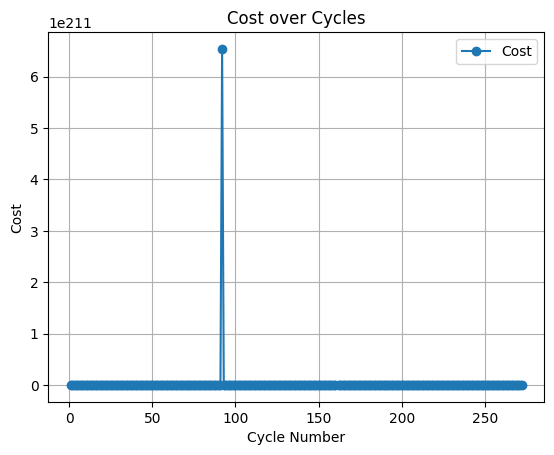

In [24]:
# Calculate mean and standard deviation of the cost values
mean_cost = np.mean(residuals3)
std_cost = np.std(residuals3)

# Calculate Z-scores
z_scores = [(cost - mean_cost) / std_cost for cost in residuals3]

# Threshold for identifying outliers (e.g., Z-score > 2)
threshold = 2
outliers = [(i + 1, residuals3[i], z_scores[i]) for i in range(len(z_scores)) if abs(z_scores[i]) > threshold]

# Print outliers
for cycle, cost, z_score in outliers:
    print(f"Outlier detected - Cycle: {cycle}, Cost: {cost:.2f}, Z-Score: {z_score:.2f}")

# Plot cost over cycles
plt.plot(range(1, len(residuals3) + 1), residuals3, marker='o', label='Cost')

# Highlight outliers
for cycle, cost, _ in outliers:
    plt.semilogy(cycle, cost, color='red', label='Outlier' if cycle == outliers[0][0] else "")
    
plt.xlabel('Cycle Number')
plt.ylabel('Cost')
plt.title('Cost over Cycles')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\onyer\AppData\Local\Temp\ipykernel_12820\3689850769.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  z_scores = [(cost - mean_cost) / std_cost for cost in residuals]


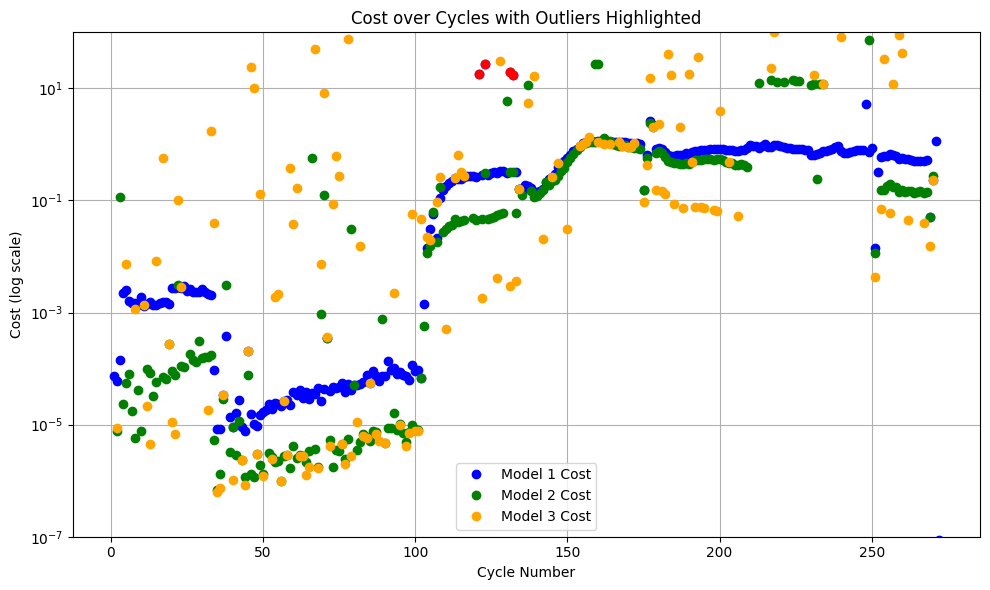

In [25]:
def plot_with_outliers(residuals, label_name, color):
    mean_cost = np.mean(residuals)
    std_cost = np.std(residuals)
    z_scores = [(cost - mean_cost) / std_cost for cost in residuals]
    threshold = 2
    outliers = [(i + 1, residuals[i], z_scores[i]) for i in range(len(z_scores)) if abs(z_scores[i]) > threshold]

    # Plot residuals
    plt.semilogy(range(1, len(residuals) + 1), residuals, marker='o', label=f'{label_name} Cost', color=color, linestyle='')

    # Highlight outliers
    for cycle, cost, _ in outliers:
        plt.semilogy(cycle, cost, 'ro')  
    return outliers

plt.figure(figsize=(10, 6))

outliers1 = plot_with_outliers(residuals1, 'Model 1', 'blue')
outliers2 = plot_with_outliers(residuals2, 'Model 2', 'green')
outliers3 = plot_with_outliers(residuals3, 'Model 3', 'orange')

plt.xlabel('Cycle Number')
plt.ylabel('Cost (log scale)')
plt.title('Cost over Cycles with Outliers Highlighted')
plt.legend()
plt.grid(True, which='both')
plt.ylim([1e-7, 1e2])
plt.tight_layout()
plt.show()

# # Optionally print outliers
# for i, outliers in enumerate([outliers1, outliers2, outliers3], start=1):
#     for cycle, cost, z_score in outliers:
#         print(f"Residuals{i} Outlier - Cycle: {cycle}, Cost: {cost:.2f}, Z-Score: {z_score:.2f}")


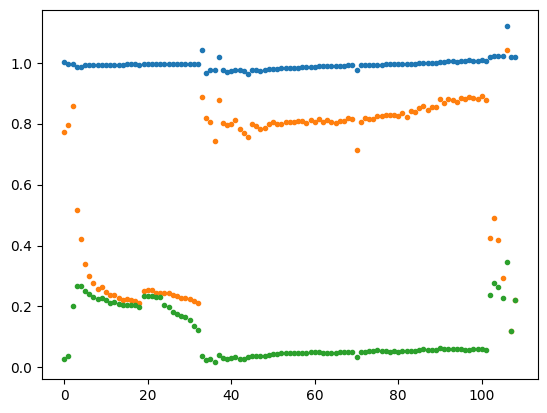

In [26]:
fig,ax = plt.subplots(1,1)
#ax.plot(np.real(estimated_poles1[0:109,0]),np.imag(estimated_poles1[0:109,0]),'k.')
#ax.plot(np.real(estimated_poles1[0:109,1]),np.imag(estimated_poles1[0:109,1]),'k.')
#ax.plot(np.real(estimated_poles1[0:109,2]),np.imag(estimated_poles1[0:109,2]),'k.')
#ax.plot(np.real(estimated_poles1[0:109,0]),'k')
ax.plot(np.abs(estimated_poles1[0:109,0]),'.')
#ax.plot(np.real(estimated_poles1[0:109,1]),'k')
ax.plot(np.abs(estimated_poles1[0:109,1]),'.')
#ax.plot(np.real(estimated_poles1[0:109,2]),'k')
ax.plot(np.abs(estimated_poles1[0:109,2]),'.')


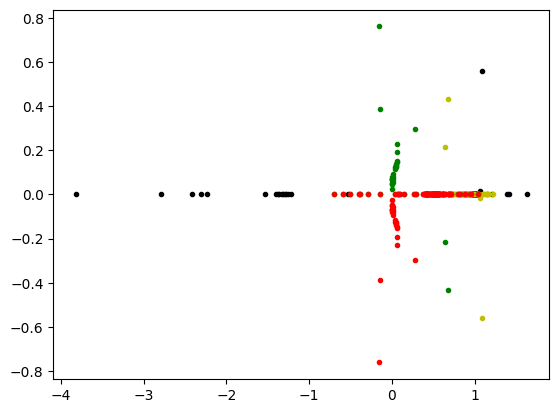

In [27]:
fig,ax = plt.subplots(1,1)


ax.plot(np.real(estimated_poles2[0:109,0]),np.imag(estimated_poles2[0:109,0]),'k.')
ax.plot(np.real(estimated_poles2[0:109,1]),np.imag(estimated_poles2[0:109,1]),'y.')
ax.plot(np.real(estimated_poles2[0:109,2]),np.imag(estimated_poles2[0:109,2]),'g.')
ax.plot(np.real(estimated_poles2[0:109,2]),np.imag(estimated_poles2[0:109,3]),'r.')
# ax.plot(np.real(estimated_poles2[0:109,0]),'k')
# ax.plot(np.abs(estimated_poles2[0:109,0]),'.')

# ax.plot(np.abs(estimated_poles2[0:109,1]),'.')

# ax.plot(np.abs(estimated_poles2[0:109,2]),'.')


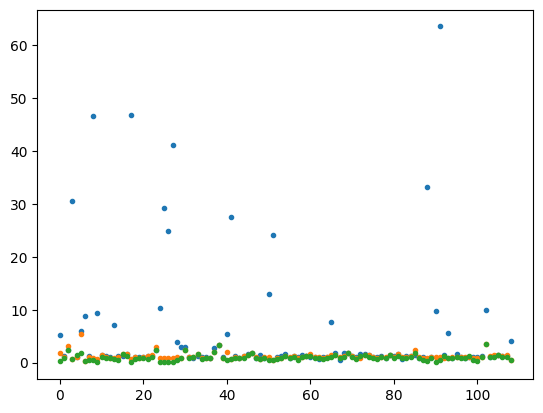

In [28]:
fig,ax = plt.subplots(1,1)

ax.plot(np.abs(estimated_poles3[0:109,0]),'.')

ax.plot(np.abs(estimated_poles3[0:109,1]),'.')

ax.plot(np.abs(estimated_poles3[0:109,2]),'.')


In [29]:
print(np.real(estimated_poles1[0:10,0]))

[1.00219267 0.99603521 0.99694915 0.98538207 0.98760938 0.99152285
 0.99100535 0.99131088 0.99255931 0.9916414 ]


In [30]:
# # Define sampling time
# Ts = 0.005

# # Loop through the arrays in yy and uu, skipping the first one
# # for i in range(199, 200):
# for i in range(1, len(yy)):
#     # Extract the optimized parameters for the current cycle
#     G_hat_box_jenkins, H_hat_box_jenkins = sid.theta_2_tf_box_jenkins(
#         optimization_results_list1[i-1].x, n_bj, Ts
#     )
    
#     # Print the transfer function
#     print(f"Cycle {i}: G_hat_box_jenkins")
#     print(G_hat_box_jenkins)
    
#     # Print zeros and poles
#     print(f"Cycle {i}: Zeros")
#     print(G_hat_box_jenkins.zeros())
#     print(f"Cycle {i}: Poles")
#     print(G_hat_box_jenkins.poles())
    
#     # Simulate the system's response using the identified transfer function
#     tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[i])
    
#     # Plot measured vs. simulated output and input on two y-axes
#     fig, ax1 = plt.subplots()

#     # Plot measured and simulated output on the left y-axis
#     ax1.plot(yy[i], 'b-', label='Measured')
#     ax1.plot(y_sim, 'g-', label='Simulated')
#     ax1.set_xlabel('Time (s)')
#     ax1.set_ylabel('Voltage', color='b')
#     ax1.tick_params(axis='y', labelcolor='b')
#     ax1.legend(loc='center right')  # Legend location: middle right

#     # Create a second y-axis for the input (control/mA)
#     ax2 = ax1.twinx()
#     ax2.plot(uu[i], 'r-', label='Input (control/mA)')
#     ax2.set_ylabel('Control/mA', color='r')
#     ax2.tick_params(axis='y', labelcolor='r')
#     ax2.legend(loc='lower right')  # Legend location: lower right

#     # Add title
#     plt.title(f'Measured vs. Simulated Outputs and Input for Cycle {i}')
    
#     # Adjust layout to avoid overlapping labels
#     fig.tight_layout()

#     # Show the plot
#     plt.show()

#     # Bode plot for the identified transfer function
#     # out = ct.bode_plot(G_hat_box_jenkins)


In [31]:
# # Define sampling time
# Ts = 0.005

# # Loop through the arrays in yy and uu, skipping the first one
# # for i in range(199, 200):
# for i in range(1, len(yy)):
#     # Extract the optimized parameters for the current cycle
#     G_hat_box_jenkins, H_hat_box_jenkins = sid.theta_2_tf_box_jenkins(
#         optimization_results_list2[i-1].x, n_bj, Ts
#     )
    
#     # Print the transfer function
#     print(f"Cycle {i}: G_hat_box_jenkins")
#     print(G_hat_box_jenkins)
    
#     # Print zeros and poles
#     print(f"Cycle {i}: Zeros")
#     print(G_hat_box_jenkins.zeros())
#     print(f"Cycle {i}: Poles")
#     print(G_hat_box_jenkins.poles())
    
#     # Simulate the system's response using the identified transfer function
#     tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[i])
    
#     # Plot measured vs. simulated output and input on two y-axes
#     fig, ax1 = plt.subplots()

#     # Plot measured and simulated output on the left y-axis
#     ax1.plot(yy[i], 'b-', label='Measured')
#     ax1.plot(y_sim, 'g-', label='Simulated')
#     ax1.set_xlabel('Time (s)')
#     ax1.set_ylabel('Voltage', color='b')
#     ax1.tick_params(axis='y', labelcolor='b')
#     ax1.legend(loc='center right')  # Legend location: middle right

#     # Create a second y-axis for the input (control/mA)
#     ax2 = ax1.twinx()
#     ax2.plot(uu[i], 'r-', label='Input (control/mA)')
#     ax2.set_ylabel('Control/mA', color='r')
#     ax2.tick_params(axis='y', labelcolor='r')
#     ax2.legend(loc='lower right')  # Legend location: lower right

#     # Add title
#     plt.title(f'Measured vs. Simulated Outputs and Input for Cycle {i}')
    
#     # Adjust layout to avoid overlapping labels
#     fig.tight_layout()

#     # Show the plot
#     plt.show()

#     # Bode plot for the identified transfer function
#     # out = ct.bode_plot(G_hat_box_jenkins)


In [32]:
# # Define sampling time
# Ts = 0.005

# # Loop through the arrays in yy and uu, skipping the first one
# # for i in range(199, 200):
# for i in range(1, len(yy)):
#     # Extract the optimized parameters for the current cycle
#     G_hat_box_jenkins, H_hat_box_jenkins = sid.theta_2_tf_box_jenkins(
#         optimization_results_list3[i-1].x, n_bj, Ts
#     )
    
#     # Print the transfer function
#     print(f"Cycle {i}: G_hat_box_jenkins")
#     print(G_hat_box_jenkins)
    
#     # Print zeros and poles
#     print(f"Cycle {i}: Zeros")
#     print(G_hat_box_jenkins.zeros())
#     print(f"Cycle {i}: Poles")
#     print(G_hat_box_jenkins.poles())
    
#     # Simulate the system's response using the identified transfer function
#     tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[i])
    
#     # Plot measured vs. simulated output and input on two y-axes
#     fig, ax1 = plt.subplots()

#     # Plot measured and simulated output on the left y-axis
#     ax1.plot(yy[i], 'b-', label='Measured')
#     ax1.plot(y_sim, 'g-', label='Simulated')
#     ax1.set_xlabel('Time (s)')
#     ax1.set_ylabel('Voltage', color='b')
#     ax1.tick_params(axis='y', labelcolor='b')
#     ax1.legend(loc='center right')  # Legend location: middle right

#     # Create a second y-axis for the input (control/mA)
#     ax2 = ax1.twinx()
#     ax2.plot(uu[i], 'r-', label='Input (control/mA)')
#     ax2.set_ylabel('Control/mA', color='r')
#     ax2.tick_params(axis='y', labelcolor='r')
#     ax2.legend(loc='lower right')  # Legend location: lower right

#     # Add title
#     plt.title(f'Measured vs. Simulated Outputs and Input for Cycle {i}')
    
#     # Adjust layout to avoid overlapping labels
#     fig.tight_layout()

#     # Show the plot
#     plt.show()

#     # Bode plot for the identified transfer function
#     # out = ct.bode_plot(G_hat_box_jenkins)


In [33]:
# Save the model, appending the estimated transfer funtion

# # Calculate mean and standard deviation of the cost values
# mean_cost = np.mean(cost_values)
# std_cost = np.std(cost_values)

# # Calculate Z-scores
# z_scores = [(cost - mean_cost) / std_cost for cost in cost_values]

# # Threshold for identifying outliers (e.g., Z-score > 2)
# threshold = 2
# outliers = [(i + 1, cost_values[i], z_scores[i]) for i in range(len(z_scores)) if abs(z_scores[i]) > threshold]

# # Print outliers
# for cycle, cost, z_score in outliers:
#     print(f"Outlier detected - Cycle: {cycle}, Cost: {cost:.2f}, Z-Score: {z_score:.2f}")

# # Plot cost over cycles
# plt.plot(range(1, len(cost_values) + 1), cost_values, marker='o', label='Cost')

# # Highlight outliers
# for cycle, cost, _ in outliers:
#     plt.scatter(cycle, cost, color='red', label='Outlier' if cycle == outliers[0][0] else "")
    
# plt.xlabel('Cycle Number')
# plt.ylabel('Cost')
# plt.title('Cost over Cycles')
# plt.legend()
# plt.grid(True)
# plt.show()


In [34]:
# out=ct.bode_plot(G_hat_box_jenkins)

In [35]:
# # # Iterate through all cycles, skipping the first one
# # for i in range(1, len(yy)):
# #     # Define t0
# #     t0 = 10
    
# #     # Simulate the system's response using the identified transfer function
# #     tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[i])
    
# #     # Ensure both yy[i] and y_sim have the same length after t0
# #     min_len = min(len(yy[i][t0:-1]), len(y_sim[t0:-1]))
    
# #     # Calculate the error (epsilon) between measured and simulated outputs
# #     epsilon = yy[i][t0:t0+min_len] - y_sim[t0:t0+min_len]
    
# #     # Plot the error
# #     fig, ax = plt.subplots(1)
# #     ax.plot(epsilon)
# #     ax.set_title(f'Error (epsilon) for Cycle {i}')
# #     ax.set_xlabel('Time (s)')
# #     ax.set_ylabel('Error (Measured - Simulated)')
# #     plt.show()
    
# #     # Perform auto-correlation test on the error signal
# #     sid.auto_correlation_test(epsilon, tau=20)


# # Iterate through all cycles, skipping the first one
# for i in range(1, len(yy)):
#     # Define t0
#     t0 = 10
    
#     # Simulate the system's response using the identified transfer function
#     tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[i])
    
#     # Ensure both yy[i] and y_sim have the same length after t0
#     yy_i_sliced = yy[i][t0:-1]  # Slice yy[i] starting from t0
#     y_sim_sliced = y_sim[t0:-1]  # Slice y_sim starting from t0
#     min_len = min(len(yy_i_sliced), len(y_sim_sliced))
    
#     # Adjust yy_i_sliced and y_sim_sliced to have the same length
#     yy_i_sliced = yy_i_sliced[:min_len]
#     y_sim_sliced = y_sim_sliced[:min_len]
    
#     # Calculate the error (epsilon) between measured and simulated outputs
#     epsilon = yy_i_sliced - y_sim_sliced
    
#     # Plot the error
#     fig, ax = plt.subplots(1)
#     ax.plot(epsilon)
#     ax.set_title(f'Error (epsilon) for Cycle {i}')
#     ax.set_xlabel('Time (s)')
#     ax.set_ylabel('Error (Measured - Simulated)')
#     plt.show()
    
#     # Perform auto-correlation test on the error signal
#     sid.auto_correlation_test(epsilon, tau=20)


In [36]:
# sid.auto_correlation_test(epsilon,tau=20)

In [37]:
# # Define sampling time
# Ts = 0.005

# # Function to process a single cycle
# def process_cycle(cycle_num, nb, nf):
#     nc = 0
#     nd = 0
#     na = nf
#     nk = 0
    
#     # Adjust input and output signals
#     uu[cycle_num] = uu[cycle_num] - uu[cycle_num][0] * np.ones(len(uu[cycle_num]))
#     yy[cycle_num] = yy[cycle_num] - yy[cycle_num][0] * np.ones(len(yy[cycle_num]))

#     # Calculate the ARX model parameters
#     n_arx = [nf, nb, nk]
#     theta_arx = sid.V_arx_lin_reg(n_arx, yy[cycle_num], uu[cycle_num])
    
#     # Prepare initial guess for Box-Jenkins model
#     theta_box_jenkins = np.concatenate((
#         theta_arx[n_arx[0]:np.sum(n_arx)], 
#         np.zeros(nc + nd), 
#         theta_arx[0:n_arx[0]]
#     ))

#     # Define the structure for the Box-Jenkins model
#     n_bj = [nb, nc, nd, nf, nk]
    
#     # Perform optimization
#     optimization_results = sp.optimize.least_squares(
#         sid.V_box_jenkins, 
#         theta_box_jenkins, 
#         jac=sid.jac_V_bj, 
#         args=(n_bj, yy[cycle_num], uu[cycle_num])
#     )
    
#     # Extract the optimized parameters
#     G_hat_box_jenkins, H_hat_box_jenkins = sid.theta_2_tf_box_jenkins(
#         optimization_results.x, n_bj, Ts
#     )
    
#     # Print the transfer function, zeros, and poles
#     print(f"Cycle {cycle_num}: G_hat_box_jenkins")
#     print(G_hat_box_jenkins)
#     print(f"Cycle {cycle_num}: Zeros")
#     print(G_hat_box_jenkins.zeros())
#     print(f"Cycle {cycle_num}: Poles")
#     print(G_hat_box_jenkins.poles())
    
#     # Simulate the system's response
#     tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[cycle_num])
    
#     # Plot measured vs. simulated output with input on a secondary y-axis
#     fig, ax1 = plt.subplots()
    
#     # Primary y-axis (left): Measured and Simulated outputs
#     ax1.plot(yy[cycle_num], label='Measured', color='blue')
#     ax1.plot(y_sim, label='Simulated', color='orange')
#     ax1.set_xlabel('Time (s)')
#     ax1.set_ylabel('Voltage')
#     ax1.legend(loc='upper left')
    
#     # Secondary y-axis (right): Input
#     ax2 = ax1.twinx()
#     ax2.plot(uu[cycle_num], label='Input', color='green')
#     ax2.set_ylabel('Control (mA)')
#     ax2.legend(loc='upper right')
    
#     # Title
#     plt.title(f'Measured vs. Simulated Outputs and Input for Cycle {cycle_num}')
    
#     # Show plot
#     plt.show()
    
#     # Bode plot
#     ct.bode_plot(G_hat_box_jenkins)

# # Process cycle 5 with nb=2, nf=3 (2nd order model)
# process_cycle(5, nb=2, nf=3)

# # Process cycle 5 with nb=3, nf=4 (better fit)
# process_cycle(5, nb=3, nf=4)

# # Process cycle 102 with nb=2, nf=3 (showing degradation)
# process_cycle(102, nb=2, nf=3)

# # Process cycle 126 (unstable model fit)
# process_cycle(126, nb=2, nf=3)
